In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sbn
import matplotlib.pyplot as plt

## Veri temizliği

In [59]:
dataFM = pd.read_excel("merc.xlsx")

In [60]:
dataFM.head()

year  price transmission  mileage  tax   mpg  engineSize
0  2005   5200    Automatic    63000  325  32.1         1.8
1  2017  34948    Automatic    27000   20  61.4         2.1
2  2016  49948    Automatic     6200  555  28.0         5.5
3  2016  61948    Automatic    16000  325  30.4         4.0
4  2016  73948    Automatic     4000  325  30.1         4.0

In [61]:
dataFM.describe()

year          price        mileage           tax           mpg  \
count  13119.000000   13119.000000   13119.000000  13119.000000  13119.000000   
mean    2017.296288   24698.596920   21949.559037    129.972178     55.155843   
std        2.224709   11842.675542   21176.512267     65.260286     15.220082   
min     1970.000000     650.000000       1.000000      0.000000      1.100000   
25%     2016.000000   17450.000000    6097.500000    125.000000     45.600000   
50%     2018.000000   22480.000000   15189.000000    145.000000     56.500000   
75%     2019.000000   28980.000000   31779.500000    145.000000     64.200000   
max     2020.000000  159999.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  13119.000000  
mean       2.071530  
std        0.572426  
min        0.000000  
25%        1.800000  
50%        2.000000  
75%        2.100000  
max        6.200000

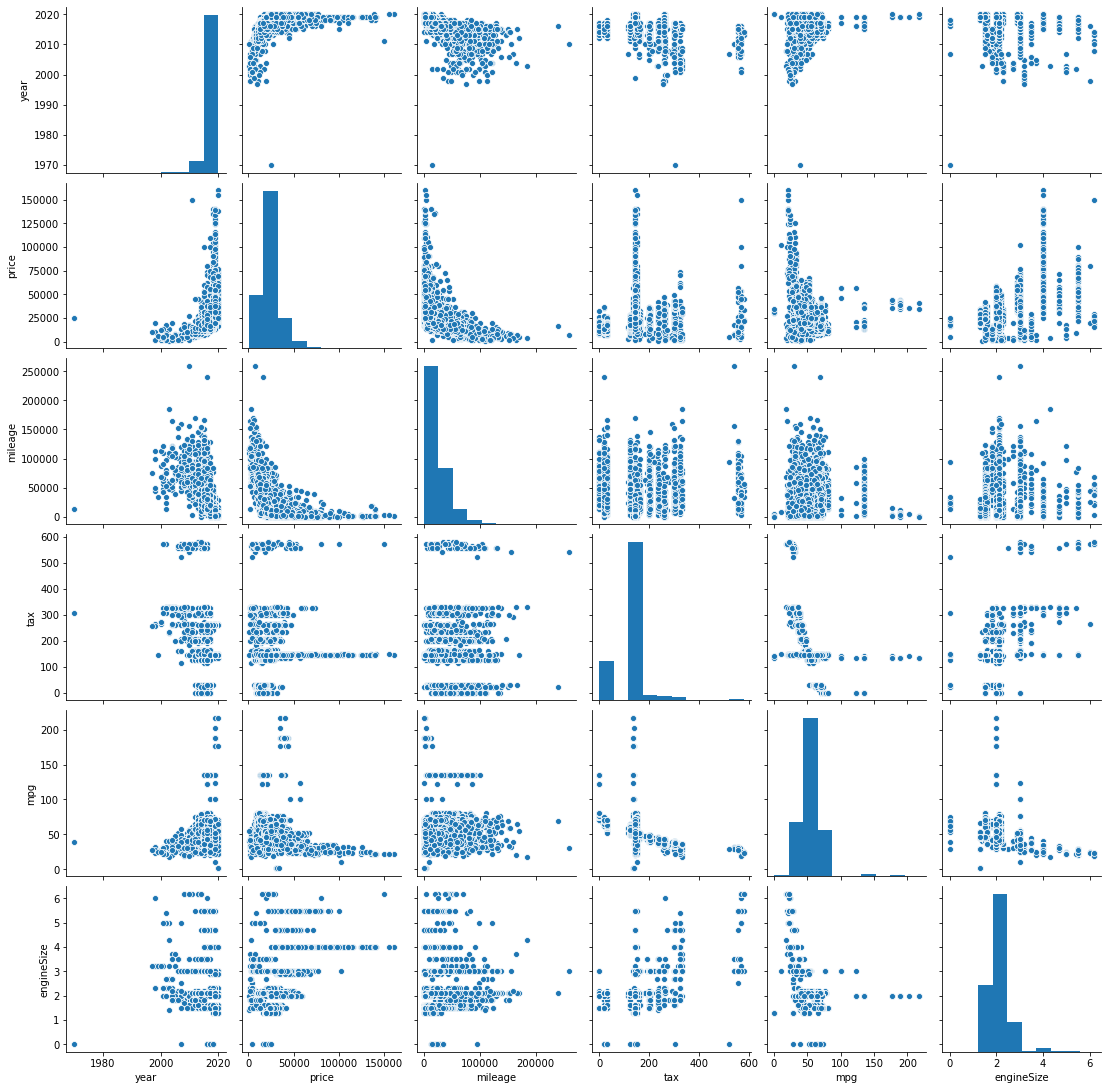

In [62]:
sbn.pairplot(dataFM)

In [63]:
dataFM.isnull().sum() # Null verilerin toplamı

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

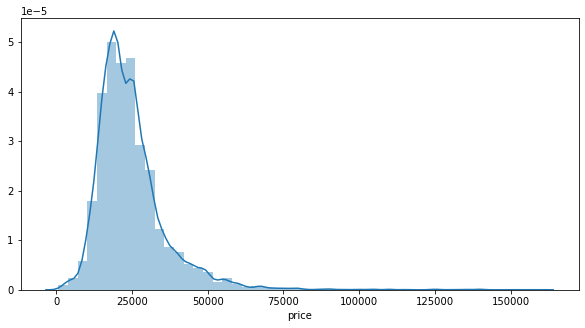

In [64]:
plt.figure(figsize= (10,5))
sbn.distplot(dataFM["price"]) #Dağılım grafiği

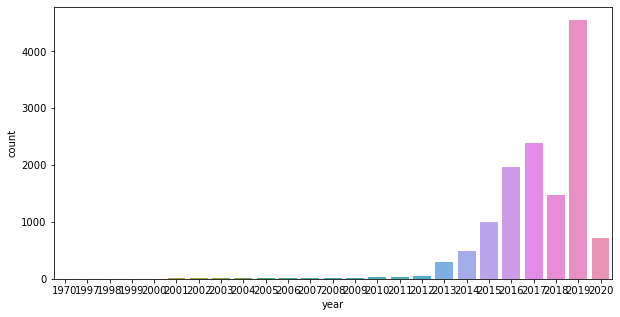

In [65]:
plt.figure(figsize= (10,5))
sbn.countplot(dataFM["year"])

In [66]:
dataFM.corr()["price"].sort_values() #Aralarındaki korelasyona bakıyoruz

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

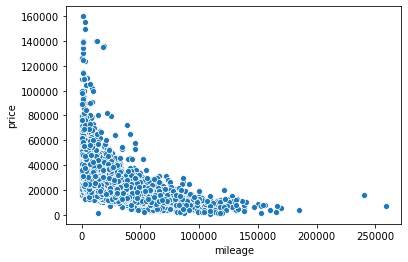

In [67]:
sbn.scatterplot(x = "mileage", y = "price", data = dataFM)

In [68]:
dataFM.sort_values("price", ascending= False).head(20)

year   price transmission  mileage  tax   mpg  engineSize
6199   2020  159999    Semi-Auto     1350  145  21.4         4.0
10044  2020  154998    Automatic     3000  150  21.4         4.0
5      2011  149948    Automatic     3000  570  21.4         6.2
8737   2019  140319    Semi-Auto      785  150  22.1         4.0
6386   2018  139995    Semi-Auto    13046  145  21.4         4.0
8      2019  139948    Automatic    12000  145  21.4         4.0
9133   2019  139559    Semi-Auto     1000  145  22.1         4.0
8821   2020  138439    Semi-Auto     1000  145  22.1         4.0
5902   2018  135771    Semi-Auto    19000  145  21.4         4.0
7864   2018  135124    Semi-Auto    18234  150  21.4         4.0
8673   2019  134219    Semi-Auto     1000  145  24.8         4.0
6210   2019  129990    Automatic     1000  145  24.8         4.0
4759   2019  126000    Automatic      250  145  24.6         4.0
2647   2019  125796    Automatic      637  145  24.8         4.0
6223   2019  124999    Automatic     1500  145  31.7         4.0
4094   2019  124366    Semi-Auto      880  145  24.8         4.0
2629   2019  123846    Semi-Auto     2951  145  22.1         4.0
7134   2019  115359    Semi-Auto     1000  145  30.1         4.0
9159   2019  114199    Semi-Auto      891  145  22.6         4.0
1980   2019  109995    Semi-Auto     4688  150  31.7         4.0

In [69]:
len(dataFM) * 0.01 #Verinin %99'unu kullanıyoruz

131.19

In [70]:
yuzdeDoksandokuzDf = dataFM.sort_values("price", ascending= False).iloc[131:] #Index'e göre yerini bulma

In [71]:
yuzdeDoksandokuzDf.describe()

year         price        mileage           tax           mpg  \
count  12988.000000  12988.000000   12988.000000  12988.000000  12988.000000   
mean    2017.281876  24074.926933   22132.741146    129.689714     55.437142   
std        2.228515   9866.224575   21196.776401     65.183076     15.025999   
min     1970.000000    650.000000       1.000000      0.000000      1.100000   
25%     2016.000000  17357.500000    6322.000000    125.000000     45.600000   
50%     2018.000000  22299.000000   15369.500000    145.000000     56.500000   
75%     2019.000000  28706.000000   31982.250000    145.000000     64.200000   
max     2020.000000  65990.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  12988.000000  
mean       2.050901  
std        0.532596  
min        0.000000  
25%        1.675000  
50%        2.000000  
75%        2.100000  
max        6.200000

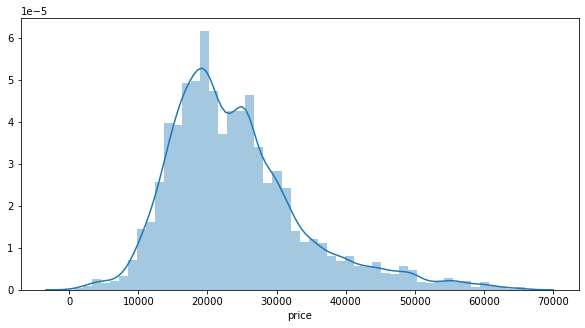

In [72]:
plt.figure(figsize= (10,5))
sbn.distplot(yuzdeDoksandokuzDf["price"])

In [73]:
dataFM.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [74]:
yuzdeDoksandokuzDf.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [75]:
dataFM[dataFM.year != 1970].groupby("year").mean()["price"]
dataFM = yuzdeDoksandokuzDf

In [78]:
dataFM.describe()
dataFM = dataFM[dataFM.year != 1970]

In [79]:
dataFM.groupby("year").mean()["price"] #verinin son hali

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [80]:
dataFM = dataFM.drop("transmission", axis = 1)

## Train

In [81]:
y = dataFM["price"].values
x = dataFM.drop("price", axis = 1).values

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [127]:
len(x_train) 
len(x_test)

3897

In [128]:
scaler = MinMaxScaler()

In [129]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [130]:
x_train.shape

(9090, 5)

In [138]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))



model.add(Dense(1)) # output

model.compile(optimizer = "adam", loss="mse")
x_train.shape

(9090, 5)

In [139]:
#batch size her teste gönderilen veir sayısı
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size=250, epochs=300)

Epoch 1/300
37/37 [==============================] - 0s 4ms/step - loss: 672145088.0000 - val_loss: 688099520.0000
Epoch 2/300
37/37 [==============================] - 0s 1ms/step - loss: 672098752.0000 - val_loss: 687985280.0000
Epoch 3/300
37/37 [==============================] - 0s 1ms/step - loss: 671748160.0000 - val_loss: 687116480.0000
Epoch 4/300
37/37 [==============================] - 0s 1ms/step - loss: 669344896.0000 - val_loss: 681611072.0000
Epoch 5/300
37/37 [==============================] - 0s 1ms/step - loss: 656300288.0000 - val_loss: 654511360.0000
Epoch 6/300
37/37 [==============================] - 0s 1ms/step - loss: 601956096.0000 - val_loss: 555341632.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 442328480.0000 - val_loss: 317020000.0000
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 186774000.0000 - val_loss: 102528760.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 9059612

Epoch 73/300
37/37 [==============================] - 0s 2ms/step - loss: 21618874.0000 - val_loss: 25570540.0000
Epoch 74/300
37/37 [==============================] - 0s 2ms/step - loss: 21531236.0000 - val_loss: 26018638.0000
Epoch 75/300
37/37 [==============================] - 0s 2ms/step - loss: 21496016.0000 - val_loss: 25642856.0000
Epoch 76/300
37/37 [==============================] - 0s 2ms/step - loss: 21366082.0000 - val_loss: 25069920.0000
Epoch 77/300
37/37 [==============================] - 0s 2ms/step - loss: 21294938.0000 - val_loss: 25860364.0000
Epoch 78/300
37/37 [==============================] - 0s 2ms/step - loss: 21245626.0000 - val_loss: 25640746.0000
Epoch 79/300
37/37 [==============================] - 0s 2ms/step - loss: 21281462.0000 - val_loss: 24733636.0000
Epoch 80/300
37/37 [==============================] - 0s 2ms/step - loss: 21094206.0000 - val_loss: 24817674.0000
Epoch 81/300
37/37 [==============================] - 0s 2ms/step - loss: 21099426.0000 

37/37 [==============================] - 0s 1ms/step - loss: 19456560.0000 - val_loss: 22585622.0000
Epoch 145/300
37/37 [==============================] - 0s 2ms/step - loss: 19328490.0000 - val_loss: 22945490.0000
Epoch 146/300
37/37 [==============================] - 0s 2ms/step - loss: 19321986.0000 - val_loss: 23346590.0000
Epoch 147/300
37/37 [==============================] - 0s 1ms/step - loss: 19273508.0000 - val_loss: 23412648.0000
Epoch 148/300
37/37 [==============================] - 0s 1ms/step - loss: 19262328.0000 - val_loss: 23176260.0000
Epoch 149/300
37/37 [==============================] - 0s 2ms/step - loss: 19280952.0000 - val_loss: 23708826.0000
Epoch 150/300
37/37 [==============================] - 0s 1ms/step - loss: 19247864.0000 - val_loss: 22849194.0000
Epoch 151/300
37/37 [==============================] - 0s 1ms/step - loss: 19236076.0000 - val_loss: 21917090.0000
Epoch 152/300
37/37 [==============================] - 0s 2ms/step - loss: 19332946.0000 - val

37/37 [==============================] - 0s 2ms/step - loss: 18552336.0000 - val_loss: 21869760.0000
Epoch 216/300
37/37 [==============================] - 0s 2ms/step - loss: 18505544.0000 - val_loss: 22459306.0000
Epoch 217/300
37/37 [==============================] - 0s 2ms/step - loss: 18582596.0000 - val_loss: 22504774.0000
Epoch 218/300
37/37 [==============================] - 0s 2ms/step - loss: 18658378.0000 - val_loss: 21308124.0000
Epoch 219/300
37/37 [==============================] - 0s 2ms/step - loss: 18557296.0000 - val_loss: 22087322.0000
Epoch 220/300
37/37 [==============================] - 0s 2ms/step - loss: 18582948.0000 - val_loss: 21175206.0000
Epoch 221/300
37/37 [==============================] - 0s 2ms/step - loss: 18461000.0000 - val_loss: 21706156.0000
Epoch 222/300
37/37 [==============================] - 0s 2ms/step - loss: 18485176.0000 - val_loss: 22474550.0000
Epoch 223/300
37/37 [==============================] - 0s 2ms/step - loss: 18507250.0000 - val

37/37 [==============================] - 0s 2ms/step - loss: 18079770.0000 - val_loss: 21471378.0000
Epoch 287/300
37/37 [==============================] - 0s 2ms/step - loss: 18121998.0000 - val_loss: 21371910.0000
Epoch 288/300
37/37 [==============================] - 0s 2ms/step - loss: 18093748.0000 - val_loss: 21516306.0000
Epoch 289/300
37/37 [==============================] - 0s 2ms/step - loss: 18087414.0000 - val_loss: 21252300.0000
Epoch 290/300
37/37 [==============================] - 0s 2ms/step - loss: 18167172.0000 - val_loss: 22310490.0000
Epoch 291/300
37/37 [==============================] - 0s 2ms/step - loss: 18118676.0000 - val_loss: 21508444.0000
Epoch 292/300
37/37 [==============================] - 0s 2ms/step - loss: 18102036.0000 - val_loss: 22284864.0000
Epoch 293/300
37/37 [==============================] - 0s 2ms/step - loss: 18085904.0000 - val_loss: 21655128.0000
Epoch 294/300
37/37 [==============================] - 0s 2ms/step - loss: 18160040.0000 - val

In [140]:
kayipVerisi = pd.DataFrame(model.history.history)

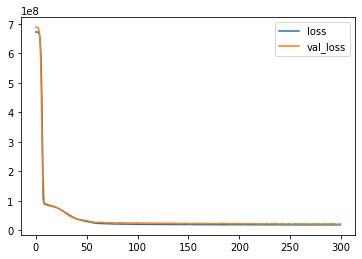

In [141]:
kayipVerisi.plot()

In [142]:
from sklearn.metrics import mean_absolute_error

In [143]:
tahminDizisi = model.predict(x_test)

In [144]:
mean_absolute_error(y_test, tahminDizisi)

3366.0816232839366

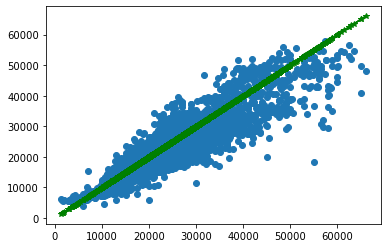

In [145]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "g-*")

In [149]:
dataFM.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [154]:
yeniArabaSeries= dataFM.drop("price", axis=1).iloc[2]

In [155]:
yeniArabaSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [156]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1, 5))

In [158]:
model.predict(yeniArabaSeries)

array([[56475.082]], dtype=float32)